In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')

print("Libraries imported successfully")

Libraries imported successfully


In [8]:
#Load Dataset
df = pd.read_csv("train.csv")

#preview dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [10]:
#shape of the dataset
df.shape

(9800, 18)

In [11]:
#column names
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [12]:
#data types & no-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [13]:
#basic statistics
df.describe

<bound method NDFrame.describe of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08-11-2017  11-11-2017    Second Class   
1          2  CA-2017-152156  08-11-2017  11-11-2017    Second Class   
2          3  CA-2017-138688  12-06-2017  16-06-2017    Second Class   
3          4  US-2016-108966  11-10-2016  18-10-2016  Standard Class   
4          5  US-2016-108966  11-10-2016  18-10-2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21-05-2017  28-05-2017  Standard Class   
9796    9797  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9797    9798  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9798    9799  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   
9799    9800  CA-2016-128608  12-01-2016  17-01-2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520    

In [14]:
#checking missing values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [18]:
#Duplicate Records
print(df.duplicated().sum())

0


In [21]:
#convert data column
df['Order Date'] = pd.to_datetime(df['Order Date'] , dayfirst = True)

In [22]:
#useful time features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.month_name()

In [23]:
#Create a Profit Column
np.random.seed(42)
df['Profit'] = df['Sales'] * np.random.uniform(0.05, 0.3, size=len(df))

In [ ]:
#Save Cleaned Dataset
df.to_csv("cleaned_sales_data.csv", index=False)

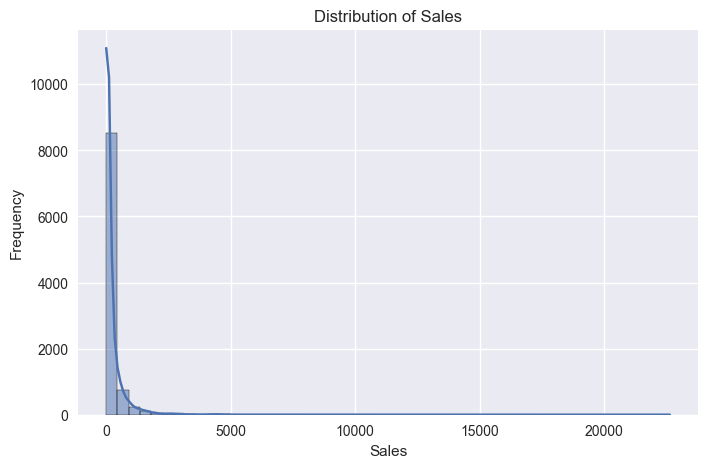

In [26]:
#Exploratory Data Analysis (EDA)
#Sales Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

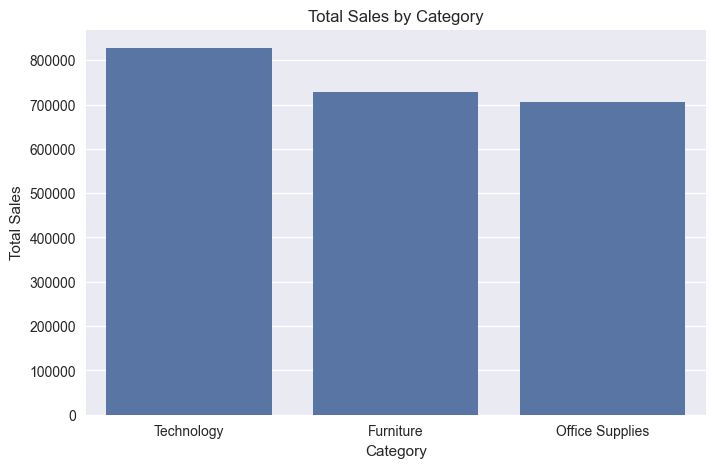

In [27]:
#Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

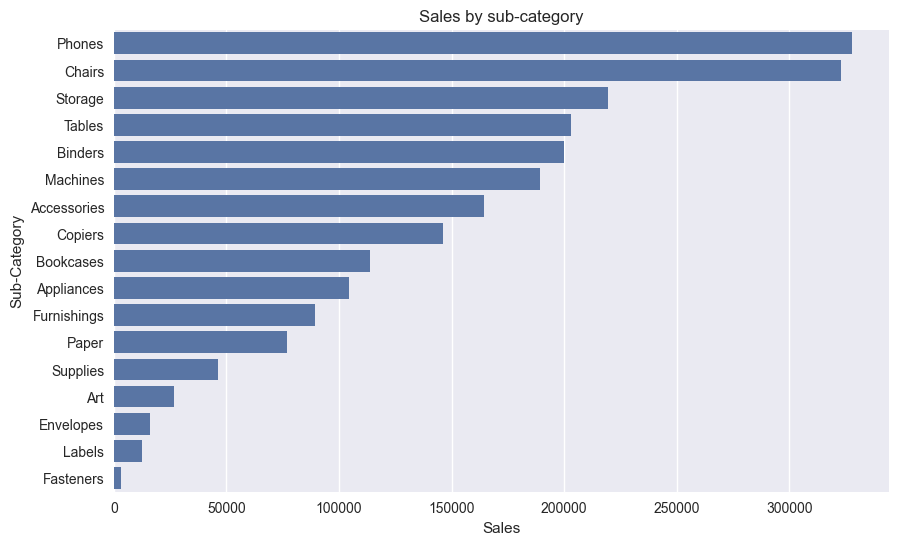

In [29]:
#Sales by Sub-Category
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(x=subcat_sales.values, y=subcat_sales.index)
plt.title("Sales by sub-category")
plt.xlabel("Sales")
plt.ylabel("Sub-Category")
plt.show()

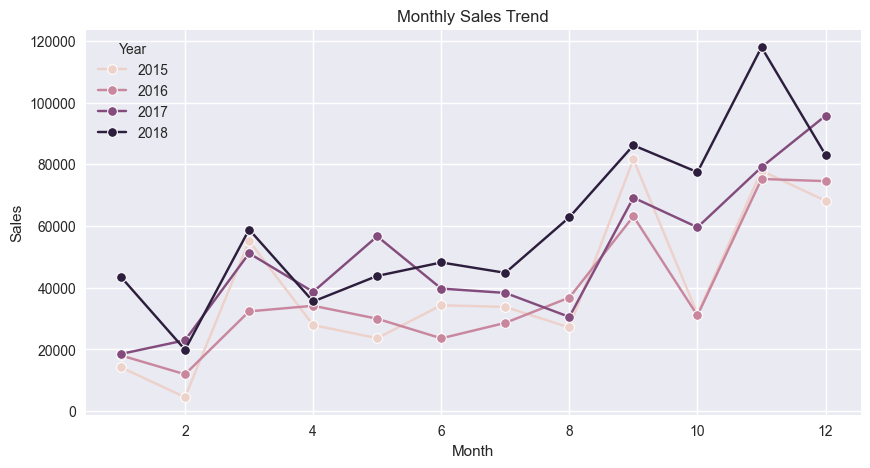

In [30]:
#Monthly Sales Trend
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title("Monthly Sales Trend")
plt.show()

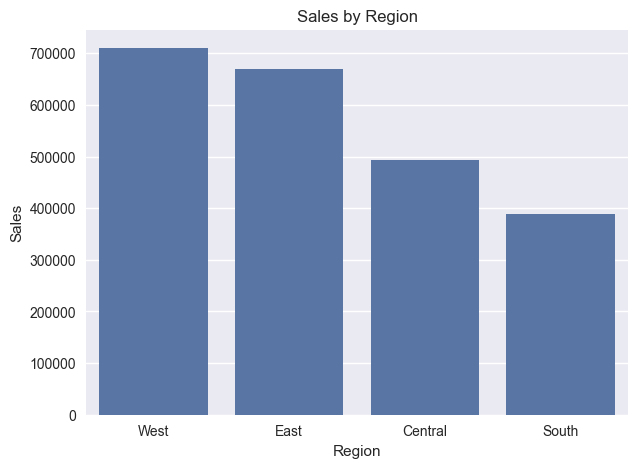

In [31]:
#Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

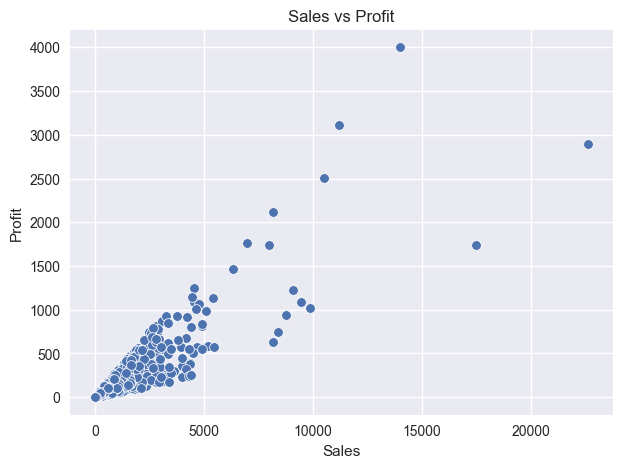

In [35]:
#Profit Analysis (Synthetic)
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Sales', y='Profit')
plt.title("Sales vs Profit")
plt.show()

In [36]:
df1 = pd.read_csv("Cleaned_sales_data.csv")
df1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Month_Name,Profit
0,1,CA-2017-152156,2017-11-08,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,November,37.626632
1,2,CA-2017-152156,2017-11-08,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,November,210.563457
2,3,CA-2017-138688,2017-06-12,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,June,3.406438
3,4,US-2016-108966,2016-10-11,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,October,191.194349
4,5,US-2016-108966,2016-10-11,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,October,1.990856


In [38]:
#Business KPIs & Insights
#KPI 1: Total Sales
total_sales = df['Sales'].sum()
print(total_sales)

2261536.7827000003


In [39]:
#KPI 2: Average Order Value
avg_order_value = df['Sales'].mean()
print(avg_order_value)

230.7690594591837


In [40]:
#KPI 3: Total Orders
total_orders = df['Order ID'].nunique()
print(total_orders)

4922


In [41]:
#KPI 4: Top 10 Customers by Sales
top_customers = (
    df.groupby('Customer Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top_customers)

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


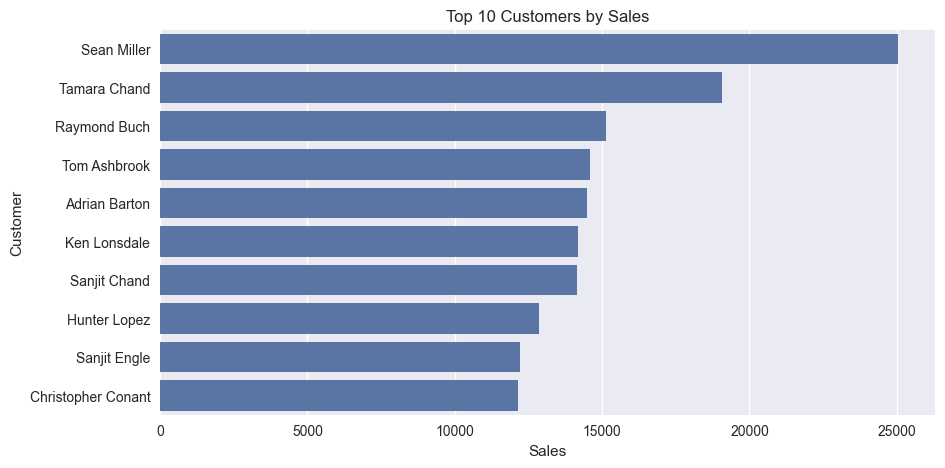

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title("Top 10 Customers by Sales")
plt.xlabel("Sales")
plt.ylabel("Customer")
plt.show()

In [43]:
#KPI 5: Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(region_sales)

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


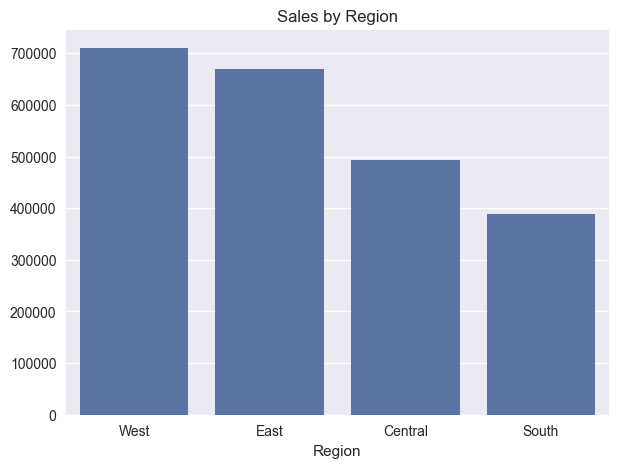

In [44]:
plt.figure(figsize=(7,5))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title("Sales by Region")
plt.show()

In [45]:
#KPI 6: Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(category_sales)

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64


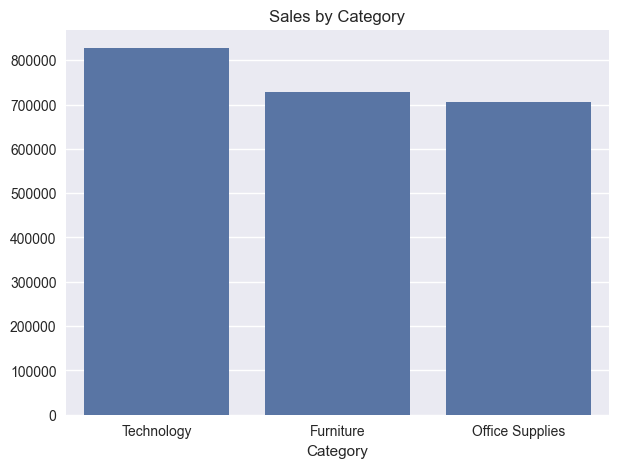

In [46]:
plt.figure(figsize=(7,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Sales by Category")
plt.show()

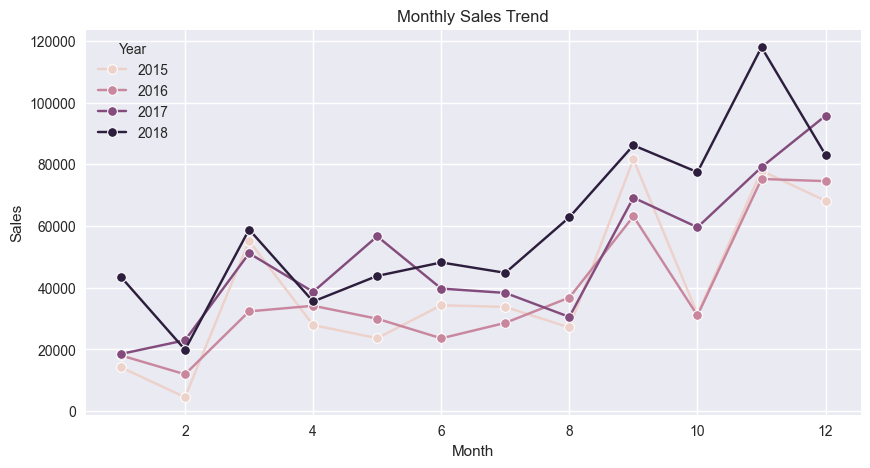

In [47]:
#KPI 7: Monthly Sales Trend
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title("Monthly Sales Trend")
plt.show()

In [48]:
#Customer Segmentation
#Prepare RFM Dataset
# Reference date (last date in dataset)
reference_date = df['Order Date'].max()

rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (reference_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
}).reset_index()

rfm.columns = ['Customer_ID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,Customer_ID,Recency,Frequency,Monetary
0,AA-10315,184,5,5563.560
1,AA-10375,19,9,1056.390
2,AA-10480,259,4,1790.512
3,AA-10645,55,6,5086.935
4,AB-10015,415,3,886.156


In [49]:
#Understand Distribution
rfm.describe()

,Recency,Frequency,Monetary
count,793.000000,793.000000,793.000000
mean,148.286255,6.206810,2851.874884
std,187.081466,2.525647,2620.668723
min,0.000000,1.000000,4.833000
25%,30.000000,4.000000,1081.466000
50%,75.000000,6.000000,2215.002000
75%,184.000000,8.000000,3670.258000
max,1165.000000,17.000000,25043.050000


In [51]:
#Create RFM Scores (1–4 Scale)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

In [52]:
#Create RFM Segment
rfm['RFM_Segment'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)

In [53]:
#Label Customer Types
def segment_customer(row):
    if row['RFM_Segment'] >= '444':
        return 'Champions'
    elif row['RFM_Segment'] >= '344':
        return 'Loyal Customers'
    elif row['RFM_Segment'] >= '244':
        return 'Potential Loyalists'
    elif row['RFM_Segment'] >= '144':
        return 'Needs Attention'
    else:
        return 'At Risk'

rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)

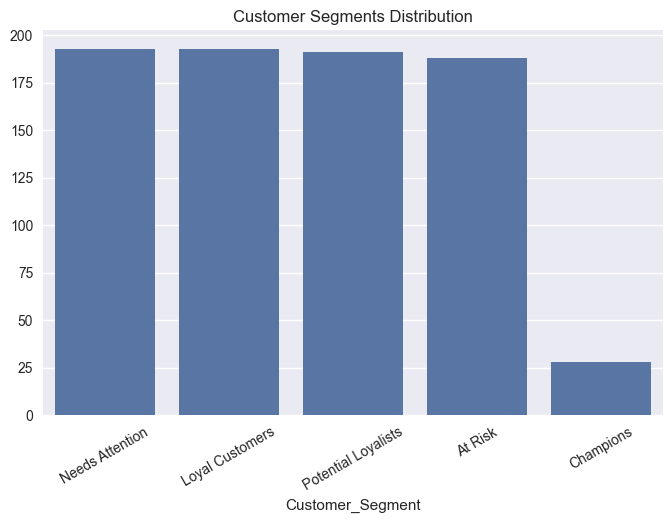

In [54]:
#Segment Distribution
segment_counts = rfm['Customer_Segment'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title("Customer Segments Distribution")
plt.xticks(rotation=30)
plt.show()